PROBLEM 1: Aminer : basic dataset analysis
This is a large dataset (about 2 million publications – it takes about a minute just to parse!). 
While your notebook must successfully work on the entire dataset, you may find it useful to work on a subset while getting your code to work.

A. Compute the number of distinct authors, publication venues, publications, and citations/references
B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?
C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)
D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.
E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?
F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?
G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results
H. What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)
I. Now repeat the calculation from item G, but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?
J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

https://en.wikipedia.org/wiki/IPython#Notebook
https://aminer.org
https://en.wikipedia.org/wiki/ECML_PKDD
https://en.wikipedia.org/wiki/Quartile

In [1]:
%pip install pandas
import pandas as pd
%pip install matplotlib
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#A. Compute the number of distinct authors, publication venues, publications, and citations/references
#df = pd.read_csv('acm.txt', header=None)

#df.to_csv('acm.csv', index=False)

#store in dictionary: 
data = {'Index': [], 'Title': [], 'Authors': [], 'Publication Venue': [], 'References': [], 'Time': []}



# approach 1: 
    # list of keys
        # if found, remove/add to list
        # after processessing entry, insert null for keys not found

# approach 2:
    # dictionary
        # variable for "index"?
        

#read in from file:
required_keys = ["Index", "Title", 'Authors', 'Publication Venue', 'References', 'Time']
citations = []
times_cited = {str:int}
# for item in list of citations:
    # increase count of the index in the dictionary by 1
with open('acm.txt', 'r', encoding = 'utf-8') as f:

    for line in f:
        # remove the '#' character:
        line = line.replace('#', '')

        line = line.split('\n')
        
        # determine when a new entry ends:
        if line[0] == '' or line[0] == EOFError:
            if len(citations) > 0:
                #data['Number of References'].append(len(citations))
                # for i in citations:
                # times_cited['Index'] += 1
                citations = ' '.join(citations)
                data['References'].append(citations)
                required_keys.remove('References')
            

            # end of previous entry, so process the entry by setting missing values to none
            for key in required_keys:
                data[key].append(None)
            
            # reset keys for next iteration
            required_keys = ["Index", "Title", 'Authors', 'Publication Venue', 'References', 'Time']
            citations = []
        else: # we are in the middle of an entry
            
            # determine attribute type:
            # title
            if line[0][0] == '*':
                line = line[0].replace('*', '')
                data['Title'].append(line)
                # mark the key as seen
                required_keys.remove('Title')
            # author
            elif line[0][0] == '@':
                line = line[0].replace('@', '')
                # split along the comma (multiple authors)
                line = line.split(', ')
                data['Authors'].append(line)
                # mark the key as seen
                required_keys.remove('Authors')
            # publication venue
            elif line[0][0] == 'c':
                line = line[0].replace('c', '', 1)
                data['Publication Venue'].append(line)
                # mark the key as seen
                required_keys.remove('Publication Venue')
            # index
            elif line[0][0] == 'i':
                line = line[0].replace('index', '')
                data['Index'].append(line)
                # mark the key as seen
                required_keys.remove('Index')
            # References
            elif line[0][0] == '%':
                line = line[0].replace('%', '')
                # dealing with multiple citations:
                citations.append(line)
                # +1 to number of cited for this relevant index
                if line in times_cited:
                    times_cited[line] += 1
                    # print(f"Updated citation count for {line}: {times_cited[line]}")
                else:
                    times_cited[line] = 1
            #  time
            elif line[0][0] == 't':
                line = line[0].replace('t', '')
                data['Time'].append(line)
                # mark the key as seen
                required_keys.remove('Time')
            # abstract
            else:
                continue

# by 1 error:
if len(citations) > 0:
    citations = ' '.join(citations)
    data['References'].append(citations)


# output: a full dictionary that is value-consistent


In [3]:
df = pd.DataFrame(data, index = data['Index'])
df

,Index,Title,Authors,Publication Venue,References,Time
1,1,MOSFET table look-up models for circuit simula...,None,"Integration, the VLSI Journal",None,1984
2,2,The verification of the protection mechanisms ...,[Virgil D. Gligor],International Journal of Parallel Programming,None,1984
3,3,Another view of functional and multivalued dep...,"[M. Gyssens, J. Paredaens]",International Journal of Parallel Programming,None,1984
4,4,Entity-relationship diagrams which are in BCNF,"[Sushil Jajodia, Peter A. Ng, Frederick N. Spr...",International Journal of Parallel Programming,None,1984
5,5,The computer comes of age,[Rene Moreau],The computer comes of age,None,1984
...,...,...,...,...,...,...
2385062,2385062,Editorial Board,None,Theoretical Computer Science,None,2016
2385063,2385063,Linear-time computation of prefix table for we...,"[-, -, -]",Theoretical Computer Science,2381731,2016
2385064,2385064,A space-efficient alphabet-independent Four-Ru...,"[-, -, -, -]",Theoretical Computer Science,2381731,2016
2385065,2385065,Computers in Entertainment (CIE) - Special Iss...,None,Computers in Entertainment (CIE),None,2016


In [4]:
# adding the number of times cited:
df['Times Cited'] = df.index.map(times_cited).fillna(0).astype(int)
print(df['Times Cited'].head(10))

#print out the number of citations for index 2007 in the dataframe
print(df.loc['2007', 'Times Cited'])

print(df.loc['369235', 'Times Cited'])

1      0
2      0
3      2
4      4
5      8
6      0
7      0
8      5
9     17
10     1
Name: Times Cited, dtype: int64
370
6526


In [5]:
df_authors = df.explode('Authors')
df_authors

,Index,Title,Authors,Publication Venue,References,Time,Times Cited
1,1,MOSFET table look-up models for circuit simula...,None,"Integration, the VLSI Journal",None,1984,0
2,2,The verification of the protection mechanisms ...,Virgil D. Gligor,International Journal of Parallel Programming,None,1984,0
3,3,Another view of functional and multivalued dep...,M. Gyssens,International Journal of Parallel Programming,None,1984,2
3,3,Another view of functional and multivalued dep...,J. Paredaens,International Journal of Parallel Programming,None,1984,2
4,4,Entity-relationship diagrams which are in BCNF,Sushil Jajodia,International Journal of Parallel Programming,None,1984,4
...,...,...,...,...,...,...,...
2385064,2385064,A space-efficient alphabet-independent Four-Ru...,-,Theoretical Computer Science,2381731,2016,0
2385064,2385064,A space-efficient alphabet-independent Four-Ru...,-,Theoretical Computer Science,2381731,2016,0
2385064,2385064,A space-efficient alphabet-independent Four-Ru...,-,Theoretical Computer Science,2381731,2016,0
2385065,2385065,Computers in Entertainment (CIE) - Special Iss...,None,Computers in Entertainment (CIE),None,2016,0


In [6]:
# A: Compute the number of distinct authors, publication venues, publications, and citations/references
distinct_authors = df_authors['Authors'].nunique()
print("Number of distinct authors:", distinct_authors)
distinct_venues = df['Publication Venue'].nunique()
print("Number of distinct publication venues:", distinct_venues)
distinct_publications = df['Title'].nunique()
print("Number of distinct publications:", distinct_publications)
distinct_citations = df['References'].nunique()
print("Number of distinct citations/references:", distinct_citations)
# explode on citations?

Number of distinct authors: 1658484
Number of distinct publication venues: 273316
Number of distinct publications: 2183504
Number of distinct citations/references: 884932


In [7]:
df.iloc[799596] #sanity check revealed i was removing all instances of 'c'

Index                                                           799597
Title                An analysis of modularity in aspect oriented d...
Authors              [Cristina Videira Lopes, Sushil Krishna Bajrac...
Publication Venue    Proceedings of the 4th international conferenc...
References           126754 208203 279738 296756 321968 343013 3886...
Time                                                              2005
Times Cited                                                         33
Name: 799597, dtype: object

In [8]:
# B: Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?
publication_ex = df['Publication Venue'].str.contains("Principles and Practice of Knowledge Discovery in Databases", case=False, na=False)
# I had to do some manipulation, i saw that my parsing was replacing ALL instances of 'c', so I had to change the parsing to only replace the first instance of 'c'

publication_ex2 = df[df['Publication Venue'] == "Principles and Practice of Knowledge Discovery in Databases"] # yields false since direct find, no entries contain direct values
# print publication_ex where true:
publication_ex[publication_ex].index

Index(['799596', '799733', '799734', '799735', '799736', '799737', '799738',
       '799739', '799740', '799741',
       ...
       '1673613', '1673614', '1673615', '1673616', '1673617', '1673618',
       '1673619', '1673620', '1673621', '1673622'],
      dtype='object', length=212)

In [9]:
for index in publication_ex[publication_ex].index:
    print(df.iloc[int(index)]['Publication Venue'])

Proceedings of the 4th international conference on Aspect-oriented software development
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Da

## OBSERVATIONS:
The publication venue names contained the string "Principles and Practice of Knowledge Discovery in Databases" differs in the preceding tag, and the spacings used.

I used .contains to capture all instances of these since there are variations in the data. 

So, numbers are NOT likely to be accurate. The data is not "uniform" and cleanly structured. There could be more data parsing to remedy this but I've spent too many hours getting this far so I will proceed if thats okay!

In [10]:
# C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)
df_temp = df_authors.groupby('Authors')['Title'].apply(list).reset_index()

In [11]:
df_temp.iloc[6]['Title'] # Sanity check

['Photoshop for 3D Artists: Volume 1 Enhance Your 3D Renders! - Previz, Texturing and Post-Production',
 'Digital Art Masters: Volume 6',
 'Digital Painting Techniques, Vol. 3',
 "Beginner's Guide to Digital Painting in Photoshop",
 'ZBrush Character Sculpting - Volume 1',
 'Digital Art Masters - Volume 7',
 'Digital Painting Techniques: Volume 4',
 'Prime: The Definitive Digital Art Collection',
 'Crafting 3D Photorealism: Lighting Workflows in 3ds Max, mental ray and V-Ray']

(array([1.657831e+06, 5.500000e+02, 7.600000e+01, 1.400000e+01,
        5.000000e+00, 2.000000e+00, 2.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.0000e+00, 1.7820e+02, 3.5540e+02, 5.3260e+02, 7.0980e+02,
        8.8700e+02, 1.0642e+03, 1.2414e+03, 1.4186e+03, 1.5958e+03,
        1.7730e+03, 1.9502e+03, 2.1274e+03, 2.3046e+03, 2.

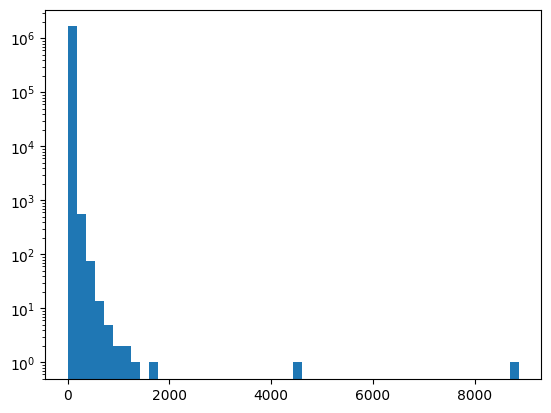

In [12]:
# Plotting the histogram:
publications_per_author = [len(titles) for titles in df_temp['Title']]
plt.hist(publications_per_author, bins = 50, log=True)

In [13]:
publications_per_author[0:10] # Sanity check

[31, 1, 1, 1, 1, 1, 9, 2, 1, 1]

In [14]:
print(len(df_temp.iloc[6]['Title']))
print(df_temp.iloc[6])

9
Authors                                         3DTotal Team
Title      [Photoshop for 3D Artists: Volume 1 Enhance Yo...
Name: 6, dtype: object


In [15]:
# print out in descending order number of publications per author
publications_per_author_sorted = sorted(publications_per_author, reverse=True)

In [16]:
publications_per_author_sorted

[8861,
 4458,
 1760,
 1307,
 1111,
 1080,
 972,
 897,
 854,
 807,
 741,
 739,
 723,
 707,
 679,
 668,
 657,
 632,
 631,
 622,
 619,
 614,
 582,
 568,
 565,
 565,
 560,
 532,
 526,
 526,
 525,
 500,
 500,
 481,
 480,
 479,
 477,
 475,
 475,
 475,
 474,
 472,
 469,
 466,
 463,
 462,
 460,
 458,
 450,
 449,
 442,
 440,
 438,
 437,
 427,
 427,
 424,
 423,
 422,
 422,
 421,
 419,
 418,
 418,
 414,
 413,
 409,
 409,
 408,
 405,
 403,
 401,
 396,
 394,
 394,
 391,
 390,
 390,
 385,
 382,
 380,
 380,
 380,
 378,
 378,
 376,
 376,
 374,
 370,
 370,
 369,
 368,
 366,
 365,
 363,
 362,
 362,
 362,
 361,
 361,
 359,
 358,
 357,
 355,
 353,
 353,
 352,
 349,
 349,
 348,
 348,
 346,
 345,
 345,
 343,
 343,
 342,
 342,
 340,
 340,
 339,
 338,
 336,
 335,
 334,
 333,
 329,
 327,
 327,
 327,
 326,
 326,
 325,
 324,
 324,
 323,
 322,
 321,
 320,
 320,
 320,
 320,
 315,
 315,
 315,
 314,
 312,
 312,
 310,
 309,
 309,
 309,
 308,
 308,
 307,
 306,
 305,
 303,
 303,
 303,
 303,
 301,
 301,
 299,
 298,
 298

In [17]:
# D. Calculate the mean and standard deviation of the number of publications per author. 
# Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. 
# Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

mean = sum(publications_per_author) / len(publications_per_author)
print("Mean of Publications per author: ", mean)

standard_dev = (sum((x - mean) ** 2 for x in publications_per_author) / len(publications_per_author)) ** 0.5
print("Stddev of publications per author: ", standard_dev)

Q1 = pd.Series(publications_per_author).quantile(0.25)
print("Q1:", Q1)

Q2 = pd.Series(publications_per_author).quantile(0.5)
print("Q2 (Median):", Q2)

Q3 = pd.Series(publications_per_author).quantile(0.75)
print("Q3:", Q3)


Mean of Publications per author:  3.4480181901061453
Stddev of publications per author:  12.646463482098177
Q1: 1.0
Q2 (Median): 1.0
Q3: 3.0


## Observations of comparisons:

Median to Mean: The mean is 3.45, and the median is 1.0. The median shows that a majority of publishers (51%) either have 0 or 1 publications. Directly comparing to the mean of 3.45, on average each author has 3.45 publications. This suggests that there are a few publishers that heavily skew the average. That is, maybe a handful of authors have a LARGE amount of publications (found one to have 8000+). This is further supported by standard deviation being such a large number at 12.65, where this value gets "penalized" for immensely large differences in counts of publications. Q1 and Q3 values also support these by having a majority of the authors only have 3 or less publications, so 25% of the authors have greater than 3 publications. 


(array([2.70994e+05, 1.45500e+03, 2.85000e+02, 1.28000e+02, 8.10000e+01,
        4.60000e+01, 3.80000e+01, 3.10000e+01, 2.90000e+01, 3.00000e+01,
        2.40000e+01, 2.00000e+01, 1.60000e+01, 6.00000e+00, 1.40000e+01,
        1.00000e+01, 6.00000e+00, 5.00000e+00, 9.00000e+00, 4.00000e+00,
        2.00000e+00, 5.00000e+00, 7.00000e+00, 7.00000e+00, 6.00000e+00,
        1.00000e+00, 8.00000e+00, 2.00000e+00, 5.00000e+00, 0.00000e+00,
        3.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00, 1.00000e+00,
        3.00000e+00, 1.00000e+00, 1.00000e+00, 3.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

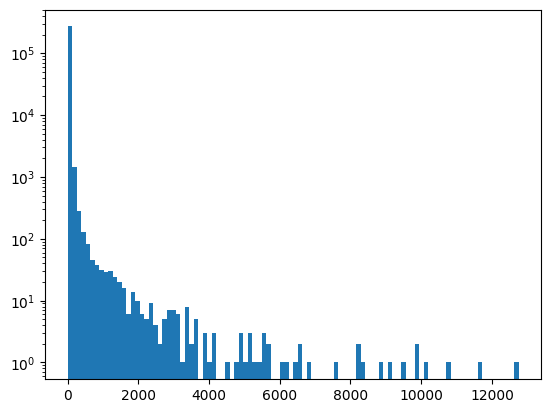

In [18]:
# E. Now plot a histogram of the number of titles per venue.
titles_per_venue = df.groupby('Publication Venue')['Title'].count()
plt.hist(titles_per_venue, bins=100, log=True)

In [19]:
# Calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?
mean_venue = titles_per_venue.mean()
print("Mean number of titles per venue: ", mean_venue)

stddev_venue = titles_per_venue.std()
print("Stddev number of titles per venue: ", stddev_venue)

Q1_venue = titles_per_venue.quantile(0.25)
print("Q1 number of titles per venue: ", Q1_venue)

Q2_venue = titles_per_venue.median()
print("Q2 (Median) number of titles per venue: ", Q2_venue)

Q3_venue = titles_per_venue.quantile(0.75)
print("Q3 number of titles per venue: ", Q3_venue)

largest_venue = titles_per_venue.idxmax()
print("Venue with the largest number of publications: ", largest_venue, "with", titles_per_venue.max(), "publications")

Mean number of titles per venue:  8.725738705381318
Stddev number of titles per venue:  106.7926579934399
Q1 number of titles per venue:  1.0
Q2 (Median) number of titles per venue:  1.0
Q3 number of titles per venue:  1.0
Venue with the largest number of publications:  IEEE Transactions on Information Theory with 12754 publications


## Observations:

These values nearly follow the same pathway as publications per author. However, these values amplify that relationship. With the Q3 value still remaining at 1.0, an enormous stddev and the mean at 8.7, this shows that there are very few publishers who output a lot of publications. HOWEVER, from part B earlier, these values "should" be even more skewed since not all publishers are properly being accounted and grouped due to the data not being uniform. 

Publication with the largest number of references:  Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles with 809.0 references


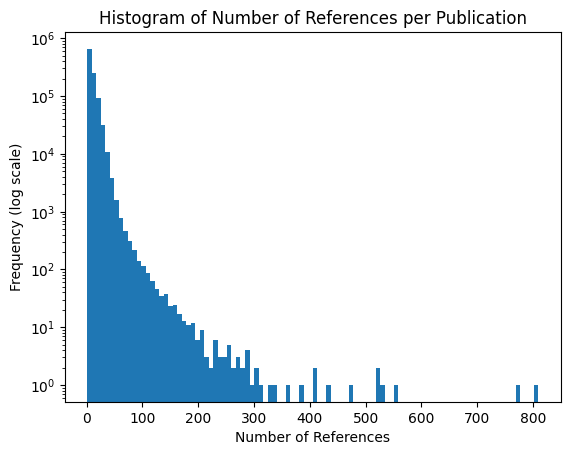

In [20]:
# F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. 
# What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?


# number of publications a publication refers to
# number of publications referring to a publication
    # per publication

# plot length of reference, vs times cited

# plt.plot(df['Times Cited'], df['References'].str.split().str.len(), 'o')
# plt.title("References vs Times Cited")
# plt.xlabel("Times Cited")
# plt.ylabel("Number of References")
# plt.show()
plt.hist(df['References'].str.split().str.len(), bins=100, log=True)
plt.title("Histogram of Number of References per Publication")
plt.xlabel("Number of References")
plt.ylabel("Frequency (log scale)")

print("Publication with the largest number of references: ", df.loc[df['References'].str.split().str.len().idxmax(), 'Title'], "with", df['References'].str.split().str.len().max(), "references")


Publication with the largest number of citations:  INFORMS Journal on Computing with 938039 citations
The index is:  2135000
Index                                     2135000
Title                INFORMS Journal on Computing
Authors                                      None
Publication Venue    INFORMS Journal on Computing
References                                2381731
Time                                         2014
Times Cited                                938039
Name: 2135000, dtype: object


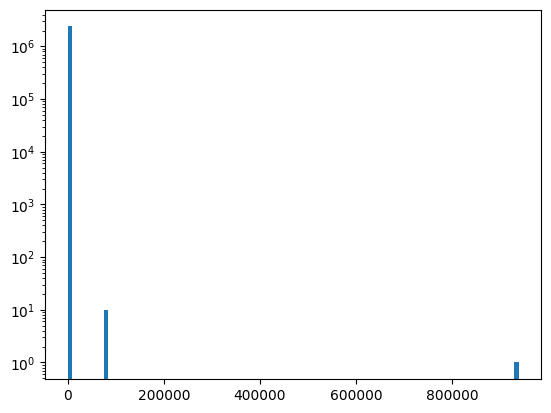

In [21]:
plt.hist(df['Times Cited'], bins=100, log=True)
print("Publication with the largest number of citations: ", df.loc[df['Times Cited'].idxmax(), 'Title'], "with", df['Times Cited'].max(), "citations")
print("The index is: ", df['Times Cited'].idxmax())
most_cited = df['Times Cited'].idxmax()
print(df.loc[most_cited])

Text(0, 0.5, 'Frequency (log scale)')

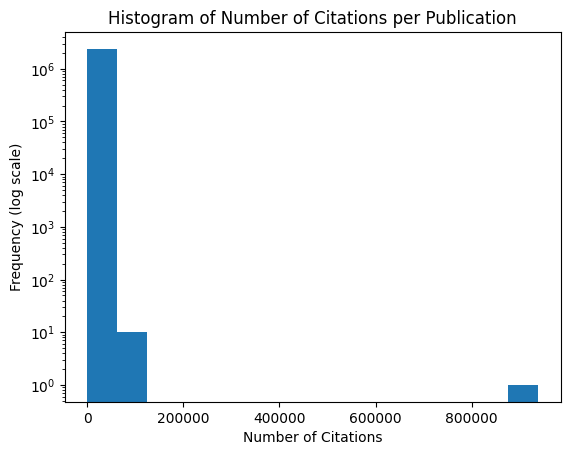

In [22]:
plt.hist(df['Times Cited'], bins=15, log=True)
plt.title("Histogram of Number of Citations per Publication")
plt.xlabel("Number of Citations")
plt.ylabel("Frequency (log scale)")



In [29]:
print("The top 10 most cited publications are:")
print(df.nlargest(20, 'Times Cited')[['Title', 'Times Cited']])

The top 10 most cited publications are:
                                                     Title  Times Cited
2135000                       INFORMS Journal on Computing       938039
2381731         Optimization in learning and data analysis        82080
2381731      The online revolution: education for everyone        82080
2381731     Predicting the present with search engine data        82080
2381731     Predicting the present with search engine data        82080
2381731     Predicting the present with search engine data        82080
2381731         The DataPaper: living in the virtual world        82080
2381731  An efficient diagnosis algorithm for inconsist...        82080
2381731  Evaluating Design Alternatives for Feature Rec...        82080
2381731  gStore: answering SPARQL queries via subgraph ...        82080
2381731  Effects of Terms Recognition Mistakes on Reque...        82080
408395   Computers and Intractability: A Guide to the T...         8620
369235   Genetic Algorit

## Observations:

These values make sense after exploring. For the number of references a publication is being referred to, I explored the acm.txt file and found that there are multiple entries of '#*Preface'. The amount would be even larger if the parsing included all forms including Preface (of:). The publication being cited the most is also verified in the .txt file to be massively prevalent in '%2135000'. We can infer it is a fundamentally sound publication that a lot of work has been based off of. 

Impact factor 0: Publication Venue
Graphics Interface 1990                                                   82080.0
AI EDAM                                                                   82080.0
Graz                                                                      82080.0
PVLDB                                                                     82080.0
IJIRR: International Journal of Information Retrieval Research.           82080.0
Computers and Intractability: A Guide to the Theory of NP-Completeness     8620.0
Genetic Algorithms in Search, Optimization and Machine Learning            6526.0
The nature of statistical learning theory                                  5297.0
C4.5: programs for machine learning                                        4882.0
Design patterns: elements of reusable object-oriented software             4717.0
dtype: float64


C:\Users\koola\AppData\Local\Temp\ipykernel_43108\3939292631.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  impact_factor = df.groupby('Publication Venue').apply(lambda x: x['Times Cited'].sum() / len(x))


(array([2.73311e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.00000e+00]),
 array([    0., 16416., 32832., 49248., 65664., 82080.]),
 <BarContainer object of 5 artists>)

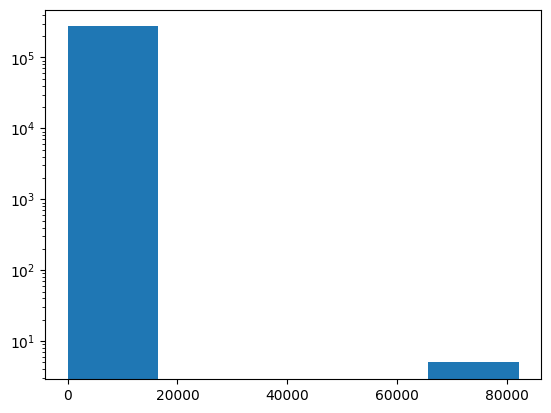

In [56]:
# G. Calculate the so called “impact” factor for each venue. 
# To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. 
# Plot a histogram of the results

impact_factor = df.groupby('Publication Venue').apply(lambda x: x['Times Cited'].sum() / len(x))
sorted_impact_factor = impact_factor.sort_values(ascending=False)
print("Impact factor 0:", sorted_impact_factor.head(10))

# impact_factors = {}
# for venue, group in df.groupby('Publication Venue'):
#     impact_factor2 = (group['Times Cited'].sum() / len(group))
#     impact_factors[venue] = impact_factor2
    #print(f"Impact factor for {venue}: {impact_factor}")


# print("Top 10 Impact Factor and their corresponding values: ", sorted(impact_factors, key=impact_factors.get, reverse=True)[:10])

plt.hist(impact_factor, bins=5, log=True)
# impact_factor = df.groupby('Publication Venue').apply(lambda x: x['Times Cited'].sum() / len(x))
# print(impact_factor.sort_values(ascending=False).head(10)) # top 10 venues by impact factor

# impact_factor = df.groupby('Publication Venue').apply(lambda x: x['References'].str.split().str.len().sum() / len(x)) #ask
# impact_factor = df.groupby('Publication Venue').apply(lambda x: x['Times Cited'].sum() / len(x))

#calculate the total number of citations for the publications in the venue
# and then divide this number by the number of publications for the venue.

# plt.hist(impact_factor, bins=50, log=True)

## Observations

Yes, I believe this number due to the fact it is a text book. It is highly referenced and based off of for academia work. 

C:\Users\koola\AppData\Local\Temp\ipykernel_43108\3053430059.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  impact_factor_filtered = df.groupby('Publication Venue').filter(lambda x: len(x) >= 10).groupby('Publication Venue').apply(lambda x: x['References'].str.split().str.len().sum() / len(x))


(array([1.504e+04, 7.385e+03, 2.560e+03, 5.110e+02, 1.090e+02, 1.600e+01,
        9.000e+00, 2.000e+00, 3.000e+00, 5.000e+00]),
 array([ 0.        ,  6.11428571, 12.22857143, 18.34285714, 24.45714286,
        30.57142857, 36.68571429, 42.8       , 48.91428571, 55.02857143,
        61.14285714]),
 <BarContainer object of 10 artists>)

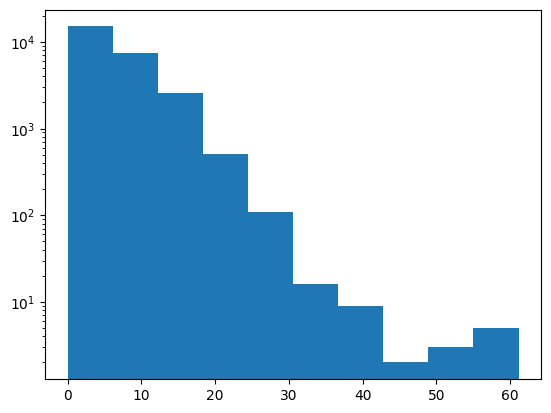

In [26]:
# I. Now repeat the calculation from item G, but restrict the calculation to venues with at least 10 publications. How does your histogram change? 
# List the citation counts for all publications from the venue with the highest impact factor. 
# How does the impact factor (mean number of citations) compare to the median number of citations?

impact_factor_filtered = df.groupby('Publication Venue').filter(lambda x: len(x) >= 10).groupby('Publication Venue').apply(lambda x: x['References'].str.split().str.len().sum() / len(x))


plt.hist(impact_factor_filtered, log=True)


In [27]:
sorted_impact_factor_filtered = impact_factor_filtered.sort_values(ascending=False)
print("Venue with the highest impact factor after filtering: ", sorted_impact_factor_filtered.idxmax(), "with an impact factor of", sorted_impact_factor_filtered.max())

Venue with the highest impact factor after filtering:  A 25-year perspective on logic programming with an impact factor of 61.142857142857146


These impact factors are lower by a factor of 10. The previous impact factor was 556, this one is 61. This means that the median is better represented, so the standard deviation is not punished as much through a few points with significantly high variance. 

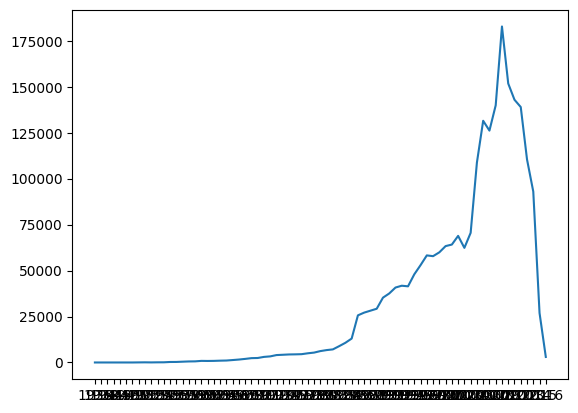

In [28]:
# J. Finally, construct a list of publications for each publication year. 

publications_per_year = df.groupby('Time')['Title'].apply(list).reset_index()

# Use this list to plot the average number of references and average number of citations per publication as a function of time.

plt.plot(publications_per_year['Time'], publications_per_year['Title'].apply(lambda x: len(x))) 

